In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

# Number of features
num_features = X.shape[1]

# Number of entries
num_entries = X.shape[0]

# Identify categorical and quantitative features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
quantitative_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Number of categorical and quantitative features
num_categorical = len(categorical_features)
num_numerical = len(quantitative_features)

print(f"Number of Features: {num_features}")
print(f"Number of Entries: {num_entries}")
print(f"Number of Categorical Features: {num_categorical}")
print(f"Number of Numerical Features: {num_numerical}")

num_classes = y.nunique()
print(f"Number of Classes: {num_classes}")

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

if False:
    # 1. Visualizing Data Distribution for Numerical Features
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(X[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # 2. Visualizing Categorical Features
    categorical_features = X.select_dtypes(include=["object"]).columns

    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(y=X[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()

# 3. Visualizing Relationships (taking two features as an example, e.g., "Feature1" and "Feature2")
# You can replace 'Feature1' and 'Feature2' with actual feature names from your dataset.
# sns.scatterplot(x='Feature1', y='Feature2', data=X)
# plt.title('Feature1 vs. Feature2')
# plt.show()


In [3]:
from ucimlrepo import fetch_ucirepo 
from sklearn.feature_extraction import FeatureHasher

# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
X = statlog_german_credit_data.data.features.copy()  # Create an explicit copy

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Calculate the number of slots available for hashing
slots_available = len(categorical_features)

# Determine the number of hash buckets for each categorical feature
hash_buckets = slots_available // len(categorical_features)

# Apply feature hashing with the calculated number of hash buckets
for feature in categorical_features:
    hasher = FeatureHasher(n_features=hash_buckets, input_type='string')
    hashed_features = hasher.transform(X[feature].astype(str)).toarray()
    
    # Drop the original column from X
    X.drop(columns=[feature], inplace=True)  # Use columns parameter to be explicit
    
    # Add the hashed features to X
    for i in range(hashed_features.shape[1]):
        X.loc[:, f"{feature}_hashed_{i}"] = hashed_features[:, i]  # Use loc for assignment

# Number of features after hashing
num_features_after_hashing = X.shape[1]

print(f"Number of Features After Hashing: {num_features_after_hashing}")


Number of Features After Hashing: 20


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMax scaling to all features in X
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, but it can make further operations easier)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the normalized data
print(X.head())


   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0    0.029412    0.050567    1.000000     1.000000     0.857143     0.333333   
1    0.647059    0.313690    0.333333     0.333333     0.053571     0.000000   
2    0.117647    0.101574    0.333333     0.666667     0.535714     0.000000   
3    0.558824    0.419941    0.333333     1.000000     0.464286     0.000000   
4    0.294118    0.254209    0.666667     1.000000     0.607143     0.333333   

   Attribute18  Attribute1_hashed_0  Attribute3_hashed_0  Attribute4_hashed_0  \
0          0.0                  0.0                  0.0             1.000000   
1          0.0                  1.0                  1.0             1.000000   
2          1.0                  0.0                  0.0             1.000000   
3          1.0                  0.0                  1.0             1.000000   
4          1.0                  0.0                  1.0             0.333333   

   Attribute6_hashed_0  Attribut

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for the first few columns
for col in X.columns[:20]:
    plt.figure(figsize=(8, 5))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

class eGAUSSp(nn.Module):
    def __init__(self, feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min):
        super(eGAUSSp, self).__init__()

        self.feature_dim = feature_dim
        self.N_max = N_max #nn.Parameter(torch.tensor(N_max, dtype=torch.float32), requires_grad=True)
        self.num_sigma = num_sigma
        self.Gamma_max = np.exp(-(num_sigma)**2) #nn.Parameter(torch.tensor(Gamma_max, dtype=torch.float32), requires_grad=True)
        self.kappa_join = kappa_join #nn.Parameter(torch.tensor(kappa_join, dtype=torch.float32), requires_grad=True)
        self.S_0 = S_0 #nn.Parameter(torch.tensor(S_0, dtype=torch.float32), requires_grad=True)

        self.c_min = c_min
        
        self.c = 0
        self.n = []
        self.mu = nn.ParameterList()
        self.S = nn.ParameterList()
        self.S_inv = nn.ParameterList()  # List to store inverse of covariance matrices for each cluster as Parameters
        
        self.V_factor = (2*np.pi** (feature_dim/2)/(feature_dim * torch.exp(torch.lgamma(torch.tensor(float(feature_dim) / 2)))))

        # Set default behavior
        self.enable_adding = True
        self.enable_merging = True

    def _update_inverse_covariance(self, cluster_index):
        """Compute and cache the inverse of the covariance matrix for a specific cluster."""
        updated_S_inv = torch.pinverse(self.S[cluster_index].data)
        
        # Convert to Parameter
        updated_S_inv_param = nn.Parameter(updated_S_inv, requires_grad=True)
        
        if cluster_index < len(self.S_inv):
            # If the inverse already exists for this cluster, update it
            self.S_inv[cluster_index] = updated_S_inv_param
        else:
            # Otherwise, append the new inverse
            self.S_inv.append(updated_S_inv_param)
            
    def compute_distance_and_activation(self, z):
            
        # Safety check for empty self.mu
        if len(self.mu) == 0:
            # Placeholder values for empty clusters
            return torch.zeros(self.c), torch.zeros(self.c)
        
        # Convert ParameterList to Tensor by converting to a list first
        mu_tensor = torch.stack(list(self.mu))
        
        # Expand dimensions to make z compatible for batch operations
        z_expanded = z.unsqueeze(0).expand(self.c, -1)
        
        # Create a mask based on condition n[i] < N_max
        mask = torch.tensor(self.n, dtype=torch.float32) < self.N_max
        
        # Compute the squared Euclidean distances only for clusters where n[i] < N_max
        d2_euclidean = torch.norm(z_expanded[mask] - mu_tensor[mask], dim=1)**2

        # Calculate Mahalanobis distance only for clusters where n[i] >= N_max
        S_inv_tensor = torch.stack(list(self.S_inv))
        diff = (z_expanded[~mask] - mu_tensor[~mask]).unsqueeze(-1)
        d2_mahalanobis = torch.bmm(torch.bmm(diff.transpose(1, 2), S_inv_tensor[~mask]), diff).squeeze()
        
        # Use mask to combine both distances
        d2 = torch.zeros(self.c, dtype=torch.float32)
        d2[mask] = d2_euclidean
        d2[~mask] = d2_mahalanobis
        
        # Compute Gamma
        Gamma = torch.exp(-d2)
        
        return Gamma, d2

    def _compute_covariance_inverse(self, covariance_matrix):
        """Compute the inverse of the given covariance matrix."""
        return torch.pinverse(covariance_matrix)

    def _add_new_cluster(self, z):
        self.c += 1
        self.n.append(1)
        self.mu.append(nn.Parameter(z.clone(), requires_grad=True))
        
        # Initial covariance matrix
        initial_cov = self.S_0 * torch.eye(self.feature_dim)
        self.S.append(nn.Parameter(initial_cov, requires_grad=True))
        
        # Compute and store its inverse
        initial_cov_inv = self._compute_covariance_inverse(initial_cov)
        self.S_inv.append(nn.Parameter(initial_cov_inv, requires_grad=True))

        
    def _increment_cluster(self, z, j):
        """Increment an existing cluster."""
        e = z - self.mu[j]
        updated_mu = self.mu[j] + 1 / (1 + self.n[j]) * e
        updated_S = self.S[j] + e.view(-1, 1) @ (z - self.mu[j]).view(1, -1)
        updated_n = self.n[j] + 1
        
        # Assign the new values
        self.mu[j].data = updated_mu
        self.S[j].data = updated_S
        self.n[j] = updated_n
        
        # Compute and store the updated inverse
        updated_S_inv = self._compute_covariance_inverse(updated_S)
        self.S_inv[j].data = updated_S_inv

    def increment_or_add_cluster(self, z, Gamma):
        
        if Gamma.numel() != 0:
            # Compute the mean cluster size
            n_mean = torch.median(torch.tensor(self.n, dtype=torch.float32))
            
            # Compute the sigmoid weights based on cluster sizes
            beta = 1.0  # Adjust this value to control the steepness of the sigmoid curve
            weights = torch.sigmoid(beta * (n_mean - torch.tensor(self.n, dtype=torch.float32)))
            _, j = torch.max(Gamma*weights, dim=0)

    
        # If adding is enabled and the condition is met
        if self.enable_adding and ((Gamma.numel() == 0) or (Gamma[j] <= self.Gamma_max)):
            self._add_new_cluster(z)
            Gamma = torch.cat((Gamma, torch.tensor([1.0])))
                            
            # Print the message about a new cluster being added
            print(f"New cluster added. Total clusters now: {self.c}")
            
        else:  # Otherwise just increment the existing cluster
            self._increment_cluster(z, j)
            
            # Print the message about a cluster being updated
            print(f"Cluster {j} updated.")
        
        return Gamma

    def merge_clusters(self, Gamma):
        
        if not self.enable_merging:
            return
        
        # If the number of clusters is below the threshold, return without merging
        if self.c <= self.c_min :
            print(f"Number of clusters ({self.c}) is below the merging threshold ({self.c_min}). No merging will be performed.")
            return
    
        merge = True
        max_iterations = 10
        iteration = 0
        clusters_checked = 0  # Counter to keep track of the number of clusters checked
    
    
        while merge and iteration < max_iterations:
            V = torch.full((self.c, self.c), float('nan'))
            Sigma_ij = torch.zeros(self.feature_dim, self.feature_dim, self.c, self.c)
            mu_ij = torch.zeros(self.feature_dim, self.c, self.c)
            n_ij = torch.zeros(self.c, self.c)
            for i in range(self.c):
                if Gamma[i] >  np.exp(-((self.num_sigma + 1)**2)):
                    # Using torch.linalg.eig
                    V[i, i] = torch.prod(torch.sqrt(torch.linalg.eig(self.S[i] / self.n[i]).eigenvalues.real))
                    for j in range(i + 1, self.c):
                        if Gamma[j] >  np.exp(-((self.num_sigma + 1)**2)):
                            clusters_checked += 1
                            n_ij[i, j] = self.n[i] + self.n[j]
                            mu_ij[:, i, j] = (self.n[i] * self.mu[i] + self.n[j] * self.mu[j]) / n_ij[i, j]
                            ZiTZi = (self.n[i] - 1) * (1 / self.n[i]) * self.S[i] + torch.diag(self.mu[i]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(self.mu[i])
                            ZjTZj = (self.n[j] - 1) * (1 / self.n[j]) * self.S[j] + torch.diag(self.mu[j]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(self.mu[j])
                            Sigma_ij[:, :, i, j] = (1 / (n_ij[i, j] - 1)) * (ZiTZi + ZjTZj - torch.diag(mu_ij[:, i, j]) @ torch.ones(self.feature_dim, self.feature_dim) @ torch.diag(mu_ij[:, i, j]))
                            # Using torch.linalg.eig
                            V[i, j] = torch.prod(torch.sqrt(torch.linalg.eig(Sigma_ij[:, :, i, j]).eigenvalues.real))
                            if V[i, j] < 0:
                                V[i, j] = float('nan')
                                        
            kappa = torch.full((self.c, self.c), float('inf'))
            for i in range(self.c):
                for j in range(i + 1, self.c):
                    kappa[i, j] = V[i, j] / (V[i, i] + V[j, j])

            kappa_min = torch.min(kappa[kappa == kappa])
            i, j = (kappa == kappa_min).nonzero(as_tuple=True)

            # Check for NaN or Inf values in kappa_min
            if~torch.isnan(kappa_min) and ~torch.isinf(kappa_min):
                print(f"Kappa min: {kappa_min.item()}")

            if kappa_min < self.kappa_join:
                self.mu[i].data = (self.n[i] * self.mu[i] + self.n[j] * self.mu[j]) / (self.n[i] + self.n[j])
                self.S[i].data = self.S[i] + self.S[j]
                self.n[i] += self.n[j]

                # Update the inverse covariance for the merged cluster
                self.S_inv[i].data = self._compute_covariance_inverse(self.S[i].data)

                del self.n[j]
                self.mu = nn.ParameterList([self.mu[k] for k in range(len(self.mu)) if k != j])
                self.S = nn.ParameterList([self.S[k] for k in range(len(self.S)) if k != j])
                self.S_inv = nn.ParameterList([self.S_inv[k] for k in range(len(self.S_inv)) if k != j])

                self.c -= 1
                merge = True
                print(f"Clusters merged. Total clusters now: {self.c}")

            else:
                merge = False
            iteration += 1
        print(f"Number of clusters checked: {clusters_checked}")
        
    def toggle_adding(self, enable=None):
        """Toggle the adding mechanism. If enable is not provided, it will just switch the current state."""
        self.enable_adding = not self.enable_adding if enable is None else enable

    def toggle_merging(self, enable=None):
        """Toggle the merging mechanism. If enable is not provided, it will just switch the current state."""
        self.enable_merging = not self.enable_merging if enable is None else enable
    
    
    def forward(self, z):
        Gamma, d2 = self.compute_distance_and_activation(z)
        Gamma = self.increment_or_add_cluster(z, Gamma)
        self.merge_clusters(Gamma)
        

In [6]:
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.cm as cm

if False:
    def plot_pairwise_square_grid_filtered(data, model, N_max):
        """Function to plot data points and cluster ellipsoids for pairs of features involving the first feature in a square grid."""
        n_features = data.shape[1]
        
        # Get combinations of the first feature with all other features
        feature_combinations = [(0, i) for i in range(1, n_features)]
        num_combinations = len(feature_combinations)
        
        # Define number of rows and columns for subplot grid
        num_rows = int(np.ceil(np.sqrt(num_combinations)))
        num_cols = num_rows
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
        fig.tight_layout(pad=4.0)  # To prevent overlap
        
        # Flatten axes for easier indexing
        axes = np.array(axes).ravel()
        
        for ax, (f1, f2) in zip(axes, feature_combinations):
            ax.scatter(data[:, f1], data[:, f2], alpha=0.5)
            
            for idx in range(len(model.mu)):
                # Check if the cluster has more than N_max samples
                if model.n[idx] > N_max:
                    mu = model.mu[idx]
                    S = model.S[idx]
                    mu_val = mu.detach().numpy()
                    cov_matrix = (S / model.n[idx]).detach().numpy()

                    # Extract values corresponding to plotted features
                    cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                    mu_subvector = mu_val[[f1, f2]]
                    
                    # Compute eigenvalues and eigenvectors
                    vals, vecs = np.linalg.eigh(cov_submatrix)
                    
                    # Compute angle of major axis
                    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                    
                    # Plot ellipse
                    factor = 3
                    width, height = factor * np.sqrt(vals)
                    ell = Ellipse(mu_subvector, width, height, angle, edgecolor='blue', lw=2, facecolor='none')
                    ax.add_patch(ell)
                    
                    ax.scatter(mu_subvector[0], mu_subvector[1], color='red', s=100, marker='x')
            
            ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
            ax.set_xlabel(f"Feature {f1+1}")
            ax.set_ylabel(f"Feature {f2+1}")
            ax.grid(True)
        
        # Turn off any remaining unused subplots
        for ax in axes[num_combinations:]:
            ax.axis('off')
        
        plt.show()

    # This updated function will plot ellipsoids only for clusters having more than N_max samples.


In [7]:
def plot_pairwise_square_grid_filtered_color_gamma_clusters_corrected(data, model, N_max, colormap='tab10'):
    """Function to color data points based on gamma values and clusters using the same colormap."""
    n_features = data.shape[1]
    
    # Compute Gamma values for each data point
    gammas = []
    for point in data:
        gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())  # Ensure point is of type Float
        gammas.append(gamma.detach().numpy())
    gammas = np.array(gammas)
    
    # Extract the dominant cluster gamma value for each data point
    dominant_gamma_values = np.max(gammas, axis=1)
    
    # Normalize the dominant gamma values
    normalized_dominant_gammas = (dominant_gamma_values - np.min(dominant_gamma_values)) / (np.max(dominant_gamma_values) - np.min(dominant_gamma_values))
    
    # Use the normalized dominant gamma values to get colors for the data points
    data_colors = cm.get_cmap(colormap)(normalized_dominant_gammas)
    
    # Get cluster colors based on their maximum gamma values
    max_gamma_per_cluster = np.max(gammas, axis=0)
    normalized_cluster_gammas = (max_gamma_per_cluster - np.min(dominant_gamma_values)) / (np.max(dominant_gamma_values) - np.min(dominant_gamma_values))
    cluster_colors = cm.get_cmap(colormap)(normalized_cluster_gammas)
    
    # Plotting logic
    feature_combinations = [(0, i) for i in range(1, n_features)]
    num_combinations = len(feature_combinations)
    num_rows = int(np.ceil(np.sqrt(num_combinations)))
    num_cols = num_rows
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.tight_layout(pad=4.0)
    axes = np.array(axes).ravel()
    
    for ax, (f1, f2) in zip(axes, feature_combinations):
        ax.scatter(data[:, f1], data[:, f2], c=data_colors, alpha=0.5)
        
        for idx in range(len(model.mu)):
            if model.n[idx] > N_max:
                mu = model.mu[idx]
                S = model.S[idx]
                mu_val = mu.detach().numpy()
                cov_matrix = (S / model.n[idx]).detach().numpy()
                cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                mu_subvector = mu_val[[f1, f2]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = 3
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(mu_subvector, width, height, angle, edgecolor=cluster_colors[idx], lw=2, facecolor='none')
                ax.add_patch(ell)
                ax.scatter(mu_subvector[0], mu_subvector[1], color=cluster_colors[idx], s=100, marker='x')
        
        ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
        ax.set_xlabel(f"Feature {f1+1}")
        ax.set_ylabel(f"Feature {f2+1}")
        ax.grid(True)
    
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.show()
    
# The function now uses the maximum gamma values to color both data points and their corresponding clusters.


In [15]:
feature_dim = 20  # or whatever the correct value is
N_max = 20  # Maximum number of clusters, provide an appropriate value
num_sigma = 3
kappa_join = 1 # Joining parameter, provide an appropriate value
S_0 = 0.001 # Initial potential value, provide an appropriate value
c_min = 1
num_classes = 2

model = eGAUSSp(feature_dim, num_classes, N_max, num_sigma, kappa_join, S_0, c_min)

for idx, point in enumerate(X.values):
    model(torch.tensor(point, dtype=torch.float32))
    if (idx + 1) % 100 == 0:  # +1 because indexing starts from 0
        print(f"                      **Processed {idx + 1} points.**")
cluster_centers = [mu.detach().numpy() for mu in model.mu]



New cluster added. Total clusters now: 1
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluster 0 updated.
Number of clusters (1) is below the merging threshold (1). No merging will be performed.
Cluste

In [ ]:

# Initialize counters
filtered_cluster_count = 0
filtered_cluster_samples = []

for idx in range(len(model.mu)):
    # Check if the cluster has more than N_max samples
    if model.n[idx] > N_max:
        filtered_cluster_count += 1
        filtered_cluster_samples.append(model.n[idx])

print(f"Number of clusters with more than {N_max} samples: {filtered_cluster_count}")
print(f"Sample counts for these clusters: {filtered_cluster_samples}")

In [37]:
# Initialize a dictionary to store accumulated memberships for each cluster and label
accumulated_memberships = {cluster_idx: {label: 0 for label in np.unique(y.values)} for cluster_idx in range(model.c)}

# For each sample, compute its membership degree to each cluster and accumulate
for point, label in zip(X.values, y.values.ravel()):
    gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())
    gamma_values = gamma.detach().numpy()
    
    for cluster_idx in range(model.c):
        accumulated_memberships[cluster_idx][label] += gamma_values[cluster_idx]

accumulated_memberships


{0: {1: 531.7144097238779, 2: 221.3746479153633},
 1: {1: 436.0179873406887, 2: 185.59689742326736},
 2: {1: 574.5426124930382, 2: 251.02232080698013},
 3: {1: 559.3708076477051, 2: 243.8229803442955},
 4: {1: 7.598859652600269, 2: 1.3250193323136563},
 5: {1: 332.55485635995865, 2: 141.7829545736313},
 6: {1: 547.0472741723061, 2: 234.1568921804428},
 7: {1: 8.825476319117538, 2: 3.6658125201361984},
 8: {1: 14.18321189424023, 2: 4.138119997278409}}

In [41]:
predicted_cluster_labels = {}

for cluster_idx, memberships in accumulated_memberships.items():
    predicted_cluster_labels[cluster_idx] = max(memberships, key=memberships.get)

predicted_cluster_labels


{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}

Class 1 (Good) count: 700
Class 2 (Bad) count: 300


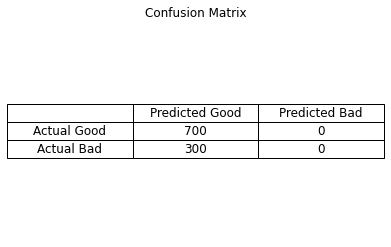

array([[700,   0],
       [300,   0]], dtype=int64)

In [46]:
import matplotlib.pyplot as plt

# Determine the predicted labels based on the maximum accumulated membership
predicted_labels = []
for point in X.values:
    memberships = [accumulated_memberships[cluster_idx][label] for cluster_idx in range(model.c)]
    best_cluster = np.argmax(memberships)
    
    # The label with the maximum accumulated membership for the best cluster
    predicted_label = max(accumulated_memberships[best_cluster], key=accumulated_memberships[best_cluster].get)
    predicted_labels.append(predicted_label)

# Now, compute and plot the confusion matrix using your provided code
class_counts = Counter(y.values.ravel())
print("Class 1 (Good) count:", class_counts[1])
print("Class 2 (Bad) count:", class_counts[2])

conf_matrix = confusion_matrix(y.values.ravel(), predicted_labels)


def plot_confusion_matrix_table_relabelled(conf_matrix):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Create the table with the confusion matrix values
    table_data = [["","Predicted Good","Predicted Bad" ],
                [ "Actual Good", conf_matrix[0, 0], conf_matrix[0, 1]],
                ["Actual Bad", conf_matrix[1, 0], conf_matrix[1, 1]]]

    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.25, 0.25, 0.25])
    
    # Adjust table properties for better visualization
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.5, 1.5)
    
    # Hide axis and display the plot
    ax.axis('off')
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix_table_relabelled(conf_matrix)
conf_matrix

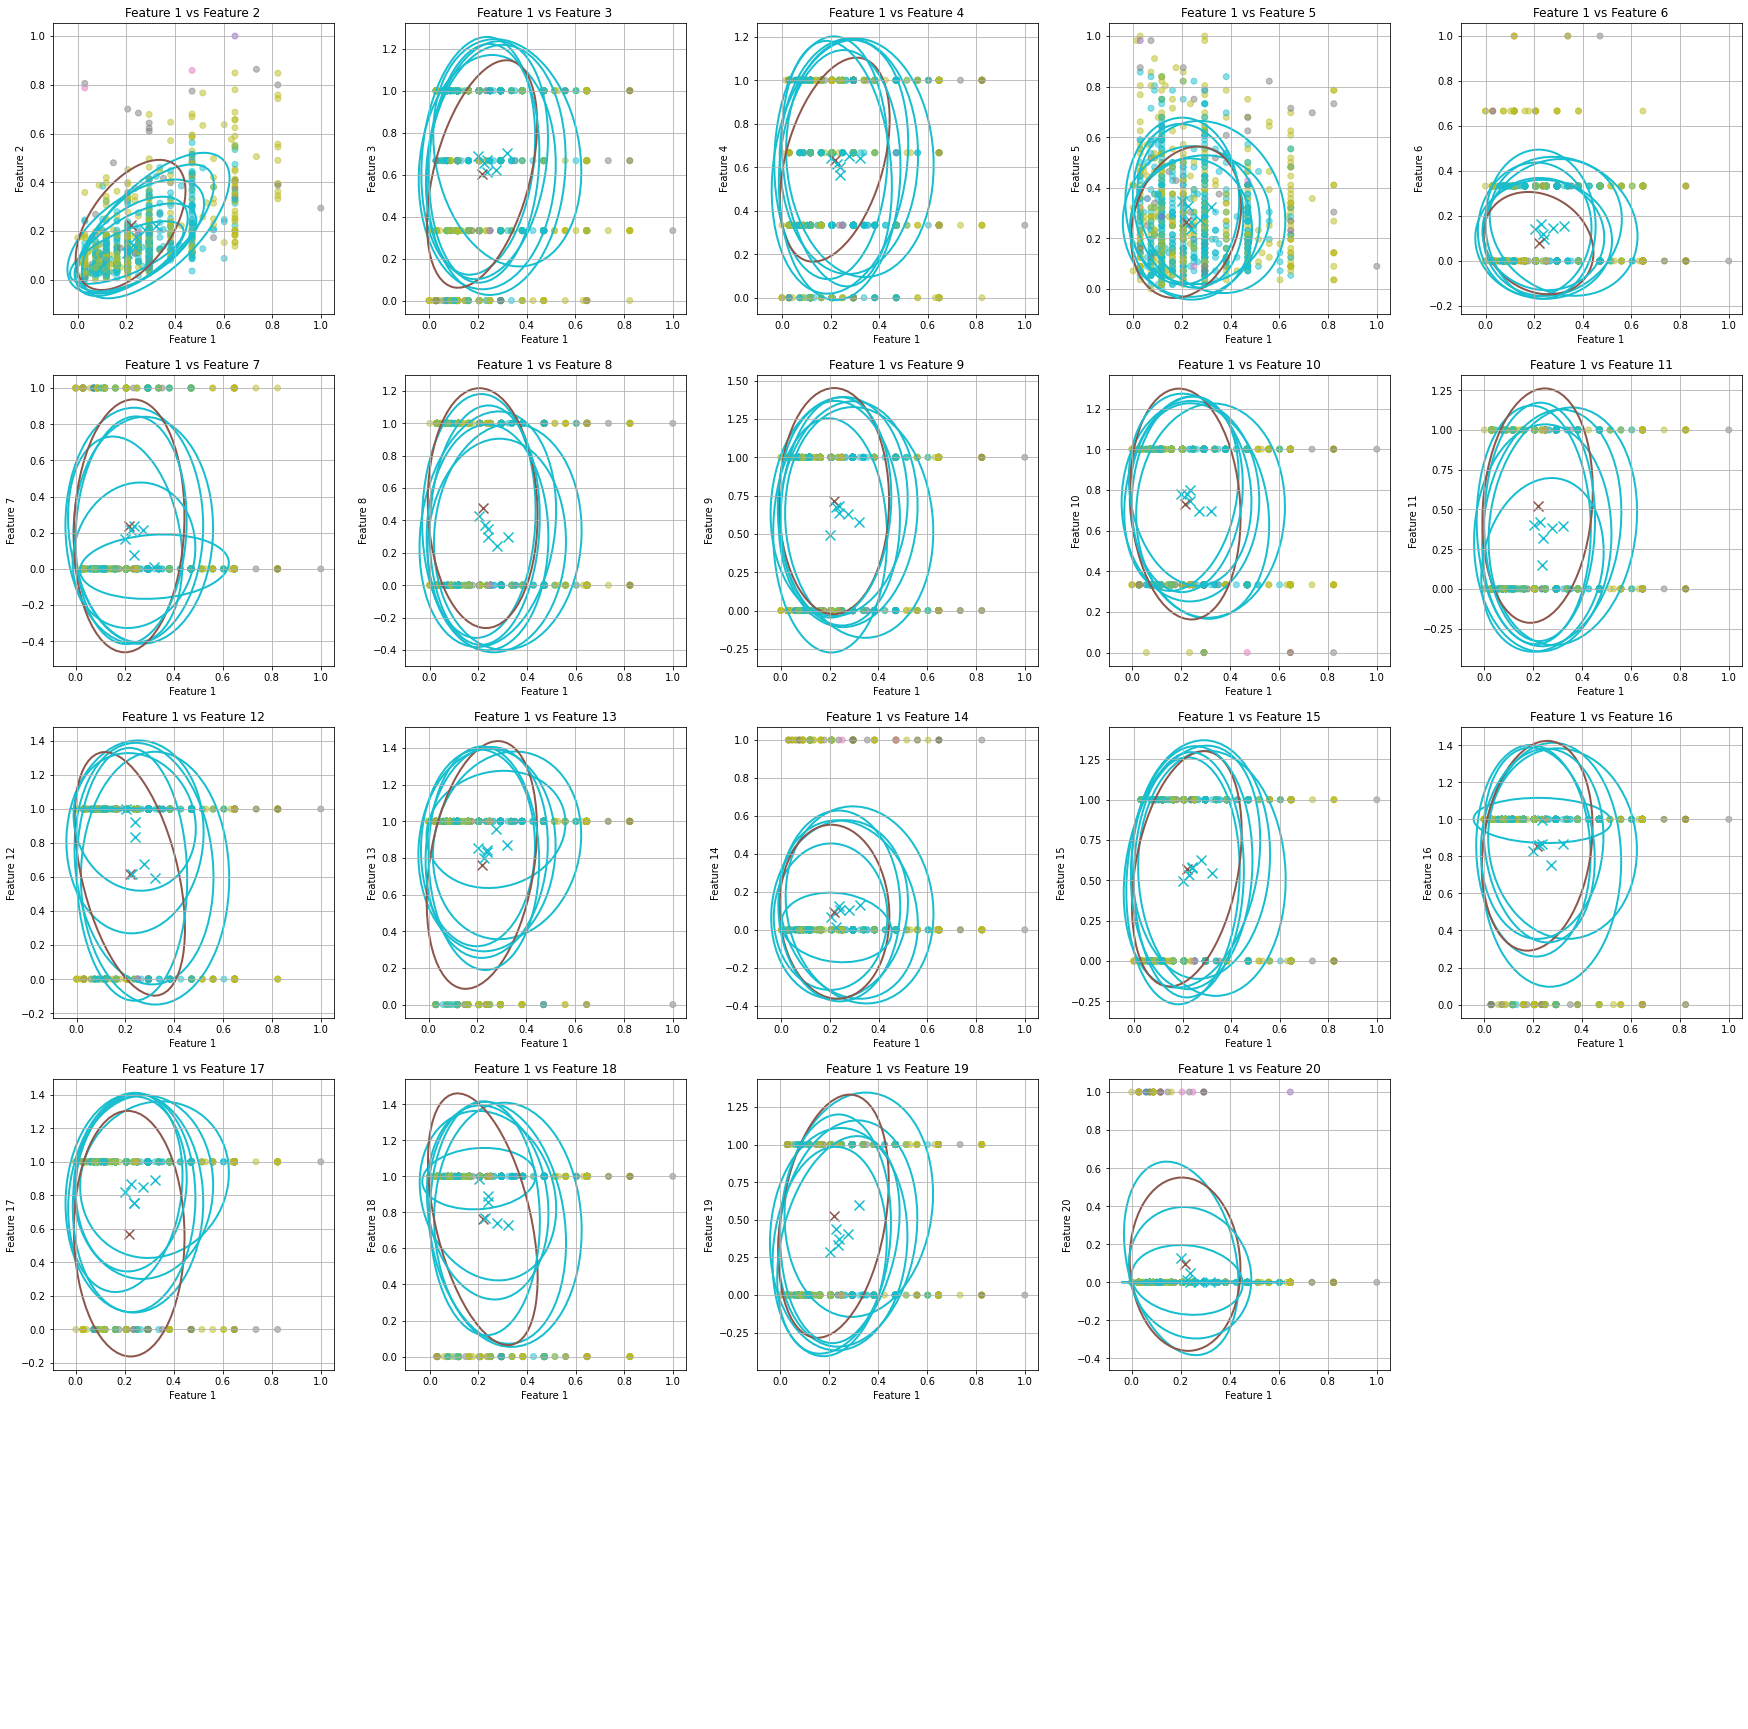

In [48]:
plot_pairwise_square_grid_filtered_color_gamma_clusters_corrected(X.values, model, N_max)

In [49]:
def plot_pairwise_square_grid_filtered_color_gamma_distinct(data, model, N_max, colormap='tab10'):
    """Function to assign distinct colors to clusters and color data points based on their maximally activated cluster."""
    n_features = data.shape[1]
    
    # Compute Gamma values for each data point
    gammas = []
    for point in data:
        gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())  # Ensure point is of type Float
        gammas.append(gamma.detach().numpy())
    gammas = np.array(gammas)
    
    # Extract the dominant cluster index for each data point
    dominant_clusters = np.argmax(gammas, axis=1)
    
    # Assign a unique color to each cluster based on its index
    cluster_colors = cm.get_cmap(colormap)(np.linspace(0, 1, len(model.mu)))
    
    # Map data points to the color of their dominant cluster
    data_colors = [cluster_colors[idx] for idx in dominant_clusters]
    
    # Plotting logic
    feature_combinations = [(0, i) for i in range(1, n_features)]
    num_combinations = len(feature_combinations)
    num_rows = int(np.ceil(np.sqrt(num_combinations)))
    num_cols = num_rows
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.tight_layout(pad=4.0)
    axes = np.array(axes).ravel()
    
    for ax, (f1, f2) in zip(axes, feature_combinations):
        ax.scatter(data[:, f1], data[:, f2], c=data_colors, alpha=0.5)
        
        for idx in range(len(model.mu)):
            if model.n[idx] > N_max:
                mu = model.mu[idx]
                S = model.S[idx]
                mu_val = mu.detach().numpy()
                cov_matrix = (S / model.n[idx]).detach().numpy()
                cov_submatrix = cov_matrix[[f1, f2]][:, [f1, f2]]
                mu_subvector = mu_val[[f1, f2]]
                vals, vecs = np.linalg.eigh(cov_submatrix)
                angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
                factor = 3
                width, height = factor * np.sqrt(vals)
                ell = Ellipse(mu_subvector, width, height, angle, edgecolor=cluster_colors[idx], lw=2, facecolor='none')
                ax.add_patch(ell)
                ax.scatter(mu_subvector[0], mu_subvector[1], color=cluster_colors[idx], s=100, marker='x')
        
        ax.set_title(f"Feature {f1+1} vs Feature {f2+1}")
        ax.set_xlabel(f"Feature {f1+1}")
        ax.set_ylabel(f"Feature {f2+1}")
        ax.grid(True)
    
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.show()

# The function now assigns a unique color to each cluster and colors data points based on their maximally activated cluster.


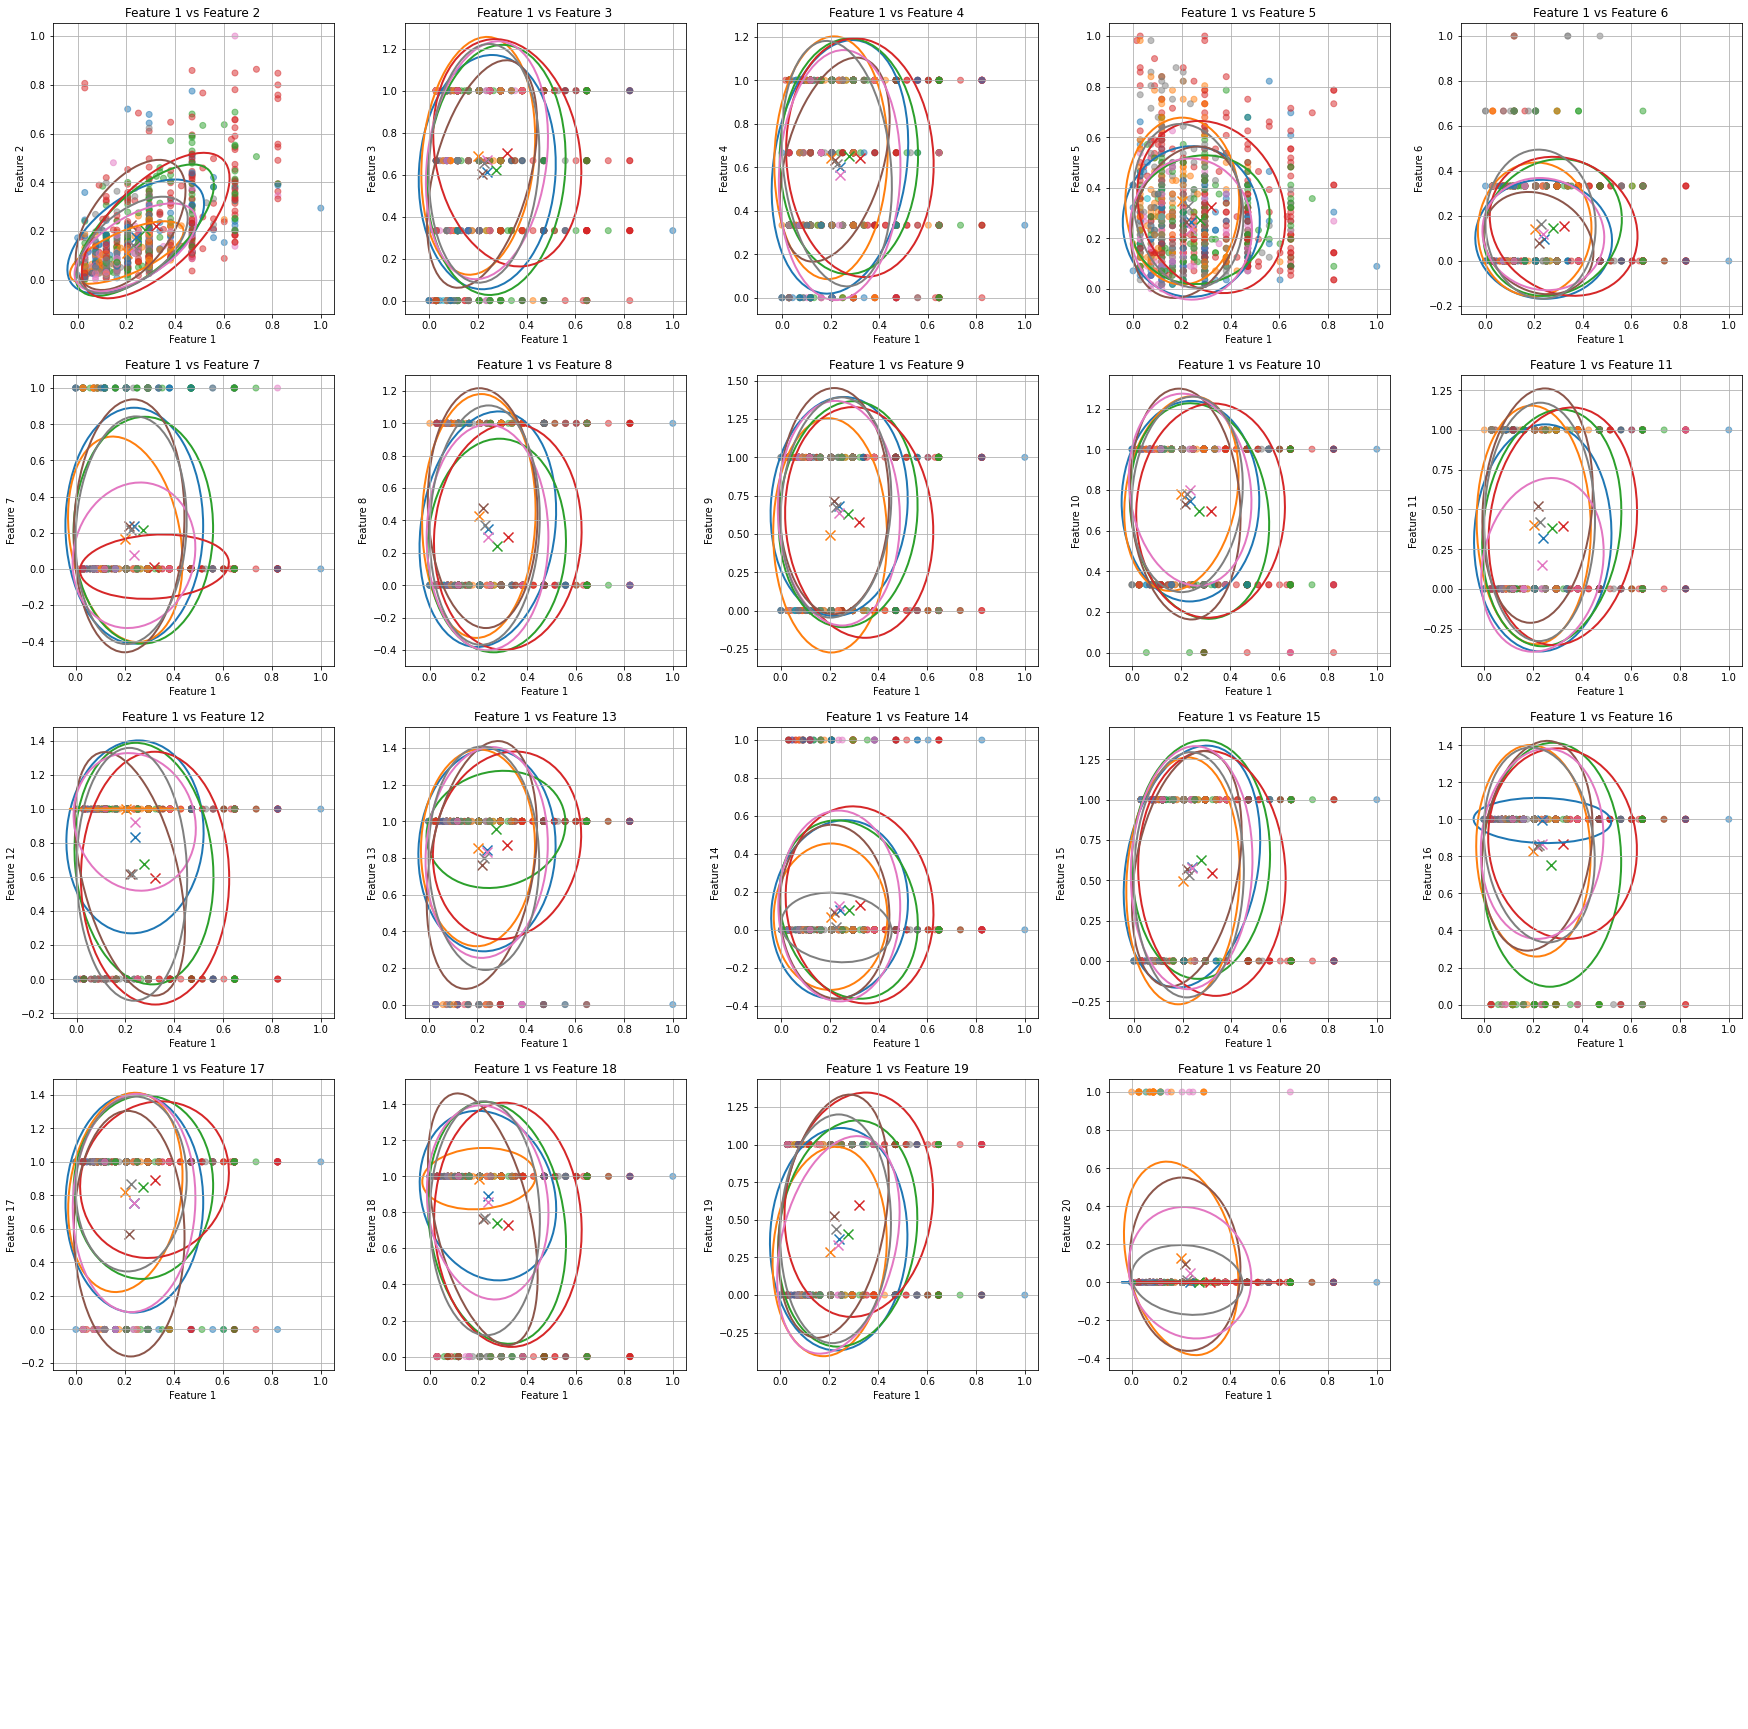

In [50]:
plot_pairwise_square_grid_filtered_color_gamma_distinct(X.values, model, N_max)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Compute memberships (gamma values) using the eGAUSSp model
gammas = []
for point in X.values:
    gamma, _ = model.compute_distance_and_activation(torch.tensor(point).float())
    gammas.append(gamma.detach().numpy())
gammas = np.array(gammas)

# Assign each data point to its maximally activated cluster
cluster_assignments = np.argmax(gammas, axis=1)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Reduce dimensionality using t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

X_pca, X_tsne

# Extract the explained variance ratio for the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio_sum = explained_variance_ratio.sum()

explained_variance_ratio, explained_variance_ratio_sum

(array([0.1148347 , 0.10394875]), 0.21878344893795748)

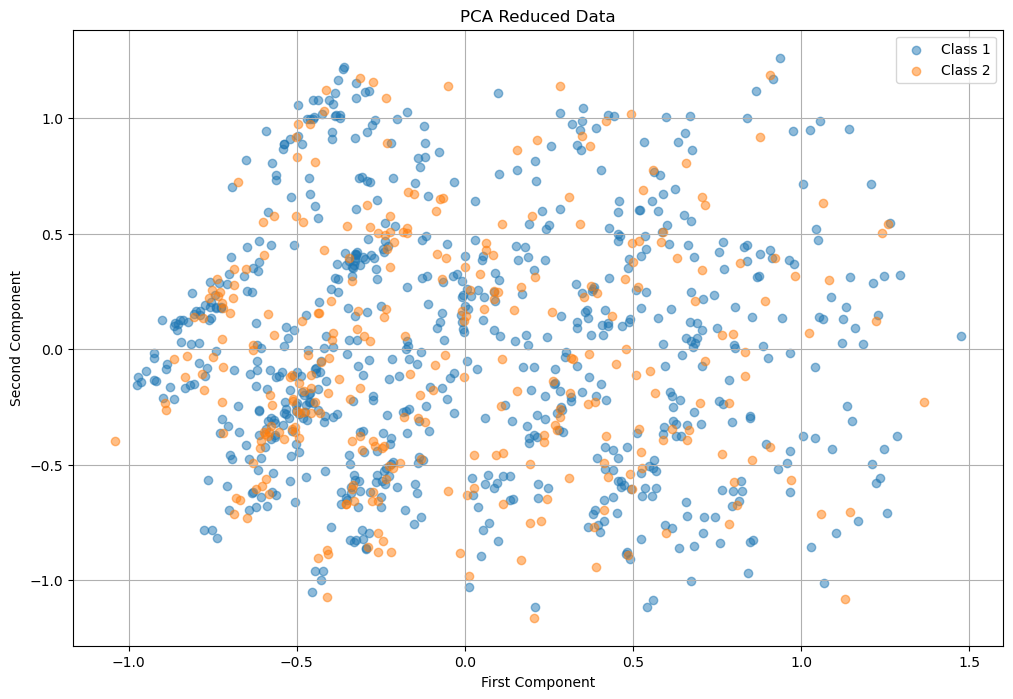

In [ ]:
# Function to visualize reduced data
def visualize_reduced_data(X_reduced, y, cluster_assignments, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a scatter plot for each unique label
    for label in np.unique(y):
        mask = y == label
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1], label=f'Class {label}', alpha=0.5)
    
    # Optionally, modify markers or sizes based on cluster assignments (for future use)
    # Example: ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_colors, marker='x', s=100)
    
    ax.set_title(title)
    ax.set_xlabel('First Component')
    ax.set_ylabel('Second Component')
    ax.legend()
    ax.grid(True)
    plt.show()


# Visualize PCA-reduced data
visualize_reduced_data(X_pca, y.values.ravel(), cluster_assignments, 'PCA Reduced Data')
